## PM2.5 Prediction Model Documentation

### 1. Introduction

This project focuses on predicting PM2.5 concentration levels using satellite-derived and IoT sensor data. The pipeline covers exploratory data analysis (EDA), feature engineering, model training, evaluation, and saving the final pipeline for deployment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df= pd.read_csv('Train.csv')
df

,id,site_id,site_latitude,site_longitude,city,country,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,...,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5
0,id_vjcx08sz91,6531a46a89b3300013914a36,6.532570,3.399360,Lagos,Nigeria,2023-10-25,13,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.015000
1,id_bkg215syli,6531a46a89b3300013914a36,6.532570,3.399360,Lagos,Nigeria,2023-11-02,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.267200
2,id_oui2pot3qd,6531a46a89b3300013914a36,6.532570,3.399360,Lagos,Nigeria,2023-11-03,13,NaN,NaN,...,6791.682888,51171.802486,5791.682829,11.816715,0.192757,-96.411890,61.045123,-121.307414,41.898269,39.450741
3,id_9aandqzy4n,6531a46a89b3300013914a36,6.532570,3.399360,Lagos,Nigeria,2023-11-08,14,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.537600
4,id_ali5x2m4iw,6531a46a89b3300013914a36,6.532570,3.399360,Lagos,Nigeria,2023-11-09,13,0.000267,0.774656,...,1451.050659,96215.906250,451.050598,10.521009,0.153114,-97.811241,49.513439,-126.064453,40.167355,19.431731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8066,id_ov6ddbfdf0,647f3a5d69df500029a2fc93,-1.268877,36.819139,Nairobi,Kenya,2024-01-17,10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.086071
8067,id_3tv6i1a09t,647f3a5d69df500029a2fc93,-1.268877,36.819139,Nairobi,Kenya,2024-01-24,11,-0.000563,0.595788,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.110000
8068,id_csqjqt3f9i,647f3a5d69df500029a2fc93,-1.268877,36.819139,Nairobi,Kenya,2024-01-25,11,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.080000
8069,id_tv6dzkz7ii,647f3a5d69df500029a2fc93,-1.268877,36.819139,Nairobi,Kenya,2024-01-26,10,-0.000188,0.746123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.026750


### 2. Data Exploration

#### What we did:
Loaded the dataset using pandas.

Explored the data to understand its structure, shape, and types of features.

Checked for missing values and statistical distributions.

#### Why:
Understanding the data ensures we know what preprocessing is necessary and which features may be most relevant.

In [2]:
df.describe()

,site_latitude,site_longitude,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,...,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5
count,8071.000000,8071.000000,8071.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,...,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,8071.000000
mean,0.635678,30.246982,10.877463,0.000024,0.687295,0.000013,0.126581,2.120939,38.671939,-92.912582,...,6089.449805,58478.947647,5105.978072,16.885186,0.255501,-18.952179,45.881380,-84.811978,28.708028,24.639296
std,2.154605,9.393151,0.815875,0.000354,0.142544,0.000220,0.094129,85.450554,18.964322,43.240479,...,2991.879500,18974.281900,2971.949265,27.547282,0.046204,85.873938,14.721454,40.627170,7.038309,24.878920
min,-3.459970,3.201510,10.000000,-0.000980,0.299364,-0.000696,0.000000,-107.710861,0.177093,-165.131509,...,521.378113,10752.090499,9.741494,1.458444,0.090547,-102.706078,2.996863,-159.058782,10.314990,1.200000
25%,0.288630,32.568643,10.000000,-0.000196,0.589849,-0.000137,0.038062,-98.911720,22.811537,-134.823883,...,3687.102253,43231.418685,2701.118575,5.612198,0.228117,-98.865659,37.901279,-125.371559,24.102775,13.270600
50%,0.332610,32.600480,11.000000,0.000012,0.669632,0.000007,0.123876,71.653160,42.564364,-95.848477,...,5389.787844,60432.792969,4389.787844,8.752905,0.257323,-97.477511,49.187592,-74.597511,29.002745,18.375400
75%,0.374653,32.641110,11.000000,0.000221,0.766817,0.000149,0.209070,74.110476,54.238408,-49.662067,...,8047.738159,74276.492371,7047.738159,14.794590,0.285948,72.814735,57.156175,-49.902340,33.929767,28.838400
max,6.595400,36.914272,14.000000,0.002024,1.607052,0.001101,0.299850,77.319656,66.234924,-22.250822,...,17287.677734,100909.219778,16287.677734,250.000002,0.417945,77.319656,66.238778,-22.251009,45.496395,456.193333


In [3]:
# Checking for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8066    False
8067    False
8068    False
8069    False
8070    False
Length: 8071, dtype: bool

In [4]:
# Checking for missing values
df.isnull().sum()

id                               0
site_id                          0
site_latitude                    0
site_longitude                   0
city                             0
                              ... 
cloud_sensor_azimuth_angle    3077
cloud_sensor_zenith_angle     3077
cloud_solar_azimuth_angle     3077
cloud_solar_zenith_angle      3077
pm2_5                            0
Length: 80, dtype: int64

In [5]:
# Drop columns with >80% missing data
threshold = 0.8
missing_fraction = df.isnull().mean()
cols_to_drop = missing_fraction[missing_fraction > threshold].index.tolist()

# Add non-informative columns
cols_to_drop += ['id']  # drop ID

# Drop them
df.drop(columns=cols_to_drop, inplace=True)

print(f"Dropped {len(cols_to_drop)} columns. Remaining: {df.shape[1]} columns")

Dropped 8 columns. Remaining: 72 columns


In [6]:
df

,site_id,site_latitude,site_longitude,city,country,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,...,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5
0,6531a46a89b3300013914a36,6.532570,3.399360,Lagos,Nigeria,2023-10-25,13,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.015000
1,6531a46a89b3300013914a36,6.532570,3.399360,Lagos,Nigeria,2023-11-02,12,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.267200
2,6531a46a89b3300013914a36,6.532570,3.399360,Lagos,Nigeria,2023-11-03,13,NaN,NaN,NaN,...,6791.682888,51171.802486,5791.682829,11.816715,0.192757,-96.411890,61.045123,-121.307414,41.898269,39.450741
3,6531a46a89b3300013914a36,6.532570,3.399360,Lagos,Nigeria,2023-11-08,14,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.537600
4,6531a46a89b3300013914a36,6.532570,3.399360,Lagos,Nigeria,2023-11-09,13,0.000267,0.774656,0.000207,...,1451.050659,96215.906250,451.050598,10.521009,0.153114,-97.811241,49.513439,-126.064453,40.167355,19.431731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8066,647f3a5d69df500029a2fc93,-1.268877,36.819139,Nairobi,Kenya,2024-01-17,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.086071
8067,647f3a5d69df500029a2fc93,-1.268877,36.819139,Nairobi,Kenya,2024-01-24,11,-0.000563,0.595788,-0.000335,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.110000
8068,647f3a5d69df500029a2fc93,-1.268877,36.819139,Nairobi,Kenya,2024-01-25,11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.080000
8069,647f3a5d69df500029a2fc93,-1.268877,36.819139,Nairobi,Kenya,2024-01-26,10,-0.000188,0.746123,-0.000140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.026750


### 3. Data Preprocessing

#### Steps:

Handled missing values through imputation.

Encoded categorical variables.

Standardized numerical features for model compatibility.

#### Why:
Machine learning algorithms work best with clean, numeric, and normalized data.

In [7]:
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include='object').columns

# Fill numeric columns with median
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Fill categorical columns with mode
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Check that missing values are handled
print("Missing values remaining:\n", df.isnull().sum().sort_values(ascending=False).head())

Missing values remaining:
 site_id                               0
site_latitude                         0
ozone_o3_column_number_density_amf    0
ozone_o3_column_number_density        0
uvaerosolindex_solar_zenith_angle     0
dtype: int64


C:\Users\Joe Oyeyinka\AppData\Local\Temp\ipykernel_7772\714776801.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [8]:
df

,site_id,site_latitude,site_longitude,city,country,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,...,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5
0,6531a46a89b3300013914a36,6.532570,3.399360,Lagos,Nigeria,2023-10-25,13,0.000012,0.669632,0.000007,...,5389.787844,60432.792969,4389.787844,8.752905,0.257323,-97.477511,49.187592,-74.597511,29.002745,12.015000
1,6531a46a89b3300013914a36,6.532570,3.399360,Lagos,Nigeria,2023-11-02,12,0.000012,0.669632,0.000007,...,5389.787844,60432.792969,4389.787844,8.752905,0.257323,-97.477511,49.187592,-74.597511,29.002745,42.267200
2,6531a46a89b3300013914a36,6.532570,3.399360,Lagos,Nigeria,2023-11-03,13,0.000012,0.669632,0.000007,...,6791.682888,51171.802486,5791.682829,11.816715,0.192757,-96.411890,61.045123,-121.307414,41.898269,39.450741
3,6531a46a89b3300013914a36,6.532570,3.399360,Lagos,Nigeria,2023-11-08,14,0.000012,0.669632,0.000007,...,5389.787844,60432.792969,4389.787844,8.752905,0.257323,-97.477511,49.187592,-74.597511,29.002745,10.537600
4,6531a46a89b3300013914a36,6.532570,3.399360,Lagos,Nigeria,2023-11-09,13,0.000267,0.774656,0.000207,...,1451.050659,96215.906250,451.050598,10.521009,0.153114,-97.811241,49.513439,-126.064453,40.167355,19.431731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8066,647f3a5d69df500029a2fc93,-1.268877,36.819139,Nairobi,Kenya,2024-01-17,10,0.000012,0.669632,0.000007,...,5389.787844,60432.792969,4389.787844,8.752905,0.257323,-97.477511,49.187592,-74.597511,29.002745,21.086071
8067,647f3a5d69df500029a2fc93,-1.268877,36.819139,Nairobi,Kenya,2024-01-24,11,-0.000563,0.595788,-0.000335,...,5389.787844,60432.792969,4389.787844,8.752905,0.257323,-97.477511,49.187592,-74.597511,29.002745,17.110000
8068,647f3a5d69df500029a2fc93,-1.268877,36.819139,Nairobi,Kenya,2024-01-25,11,0.000012,0.669632,0.000007,...,5389.787844,60432.792969,4389.787844,8.752905,0.257323,-97.477511,49.187592,-74.597511,29.002745,15.080000
8069,647f3a5d69df500029a2fc93,-1.268877,36.819139,Nairobi,Kenya,2024-01-26,10,-0.000188,0.746123,-0.000140,...,5389.787844,60432.792969,4389.787844,8.752905,0.257323,-97.477511,49.187592,-74.597511,29.002745,18.026750


In [9]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Create new time-based features
df['day_of_week'] = df['date'].dt.dayofweek      # 0 = Monday, 6 = Sunday
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Combine date and hour into a timestamp
df['timestamp'] = df['date'] + pd.to_timedelta(df['hour'], unit='h')

# Preview new features
print(df[['date', 'hour', 'day_of_week', 'is_weekend', 'month', 'day', 'timestamp']].head())


        date  hour  day_of_week  is_weekend  month  day           timestamp
0 2023-10-25    13            2           0     10   25 2023-10-25 13:00:00
1 2023-11-02    12            3           0     11    2 2023-11-02 12:00:00
2 2023-11-03    13            4           0     11    3 2023-11-03 13:00:00
3 2023-11-08    14            2           0     11    8 2023-11-08 14:00:00
4 2023-11-09    13            3           0     11    9 2023-11-09 13:00:00


In [10]:
df

,site_id,site_latitude,site_longitude,city,country,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,...,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5,day_of_week,is_weekend,day,timestamp
0,6531a46a89b3300013914a36,6.532570,3.399360,Lagos,Nigeria,2023-10-25,13,0.000012,0.669632,0.000007,...,0.257323,-97.477511,49.187592,-74.597511,29.002745,12.015000,2,0,25,2023-10-25 13:00:00
1,6531a46a89b3300013914a36,6.532570,3.399360,Lagos,Nigeria,2023-11-02,12,0.000012,0.669632,0.000007,...,0.257323,-97.477511,49.187592,-74.597511,29.002745,42.267200,3,0,2,2023-11-02 12:00:00
2,6531a46a89b3300013914a36,6.532570,3.399360,Lagos,Nigeria,2023-11-03,13,0.000012,0.669632,0.000007,...,0.192757,-96.411890,61.045123,-121.307414,41.898269,39.450741,4,0,3,2023-11-03 13:00:00
3,6531a46a89b3300013914a36,6.532570,3.399360,Lagos,Nigeria,2023-11-08,14,0.000012,0.669632,0.000007,...,0.257323,-97.477511,49.187592,-74.597511,29.002745,10.537600,2,0,8,2023-11-08 14:00:00
4,6531a46a89b3300013914a36,6.532570,3.399360,Lagos,Nigeria,2023-11-09,13,0.000267,0.774656,0.000207,...,0.153114,-97.811241,49.513439,-126.064453,40.167355,19.431731,3,0,9,2023-11-09 13:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8066,647f3a5d69df500029a2fc93,-1.268877,36.819139,Nairobi,Kenya,2024-01-17,10,0.000012,0.669632,0.000007,...,0.257323,-97.477511,49.187592,-74.597511,29.002745,21.086071,2,0,17,2024-01-17 10:00:00
8067,647f3a5d69df500029a2fc93,-1.268877,36.819139,Nairobi,Kenya,2024-01-24,11,-0.000563,0.595788,-0.000335,...,0.257323,-97.477511,49.187592,-74.597511,29.002745,17.110000,2,0,24,2024-01-24 11:00:00
8068,647f3a5d69df500029a2fc93,-1.268877,36.819139,Nairobi,Kenya,2024-01-25,11,0.000012,0.669632,0.000007,...,0.257323,-97.477511,49.187592,-74.597511,29.002745,15.080000,3,0,25,2024-01-25 11:00:00
8069,647f3a5d69df500029a2fc93,-1.268877,36.819139,Nairobi,Kenya,2024-01-26,10,-0.000188,0.746123,-0.000140,...,0.257323,-97.477511,49.187592,-74.597511,29.002745,18.026750,4,0,26,2024-01-26 10:00:00


In [11]:
# Encoding Categorical variables
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_cols = ['site_id', 'city', 'country']

# Initialize the encoder
label_encoder = LabelEncoder()

# Encode each categorical column
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Preview encoded values
print(df[categorical_cols].head())


   site_id  city  country
0       56     2        2
1       56     2        2
2       56     2        2
3       56     2        2
4       56     2        2


### 4. Feature Engineering & Data Preprocessing

This section was crucial to preparing the data for machine learning. Steps included:

#### a) Handling Missing Values

Numerical features were imputed using the median value to reduce the impact of outliers.

Categorical features (if any) were imputed using the most frequent value.

#### b) Feature Selection

Highly correlated features were checked to prevent multicollinearity.

Features irrelevant to PM2.5 prediction were dropped.

#### c) Train-Test Split

Data was split into training and test sets using an 80/20 ratio to evaluate performance on unseen data.

#### d) Pipeline Construction

A scikit-learn Pipeline was built to automate preprocessing and modeling in a single object. This included:

ColumnTransformer for numerical transformations.

RandomForestRegressor as the model for PM2.5 prediction.

In [12]:
from sklearn.model_selection import train_test_split

# 🎯 Target variable
target = 'pm2_5'

# 🧠 Features to use (drop target and timestamp for modeling)
X = df.drop(columns=[target, 'timestamp'])

# Only include numeric columns (models can't handle datetime or objects directly)
X = X.select_dtypes(include=['float64', 'int64'])

# Target column
y = df[target]

# 🧪 Split into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training shape:", X_train.shape)
print("Test shape:", X_test.shape)

Training shape: (6456, 67)
Test shape: (1615, 67)


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("✅ Model Evaluation:")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R² (R-squared score): {r2:.2f}")


✅ Model Evaluation:
MAE (Mean Absolute Error): 8.48
RMSE (Root Mean Squared Error): 23.12
R² (R-squared score): 0.24


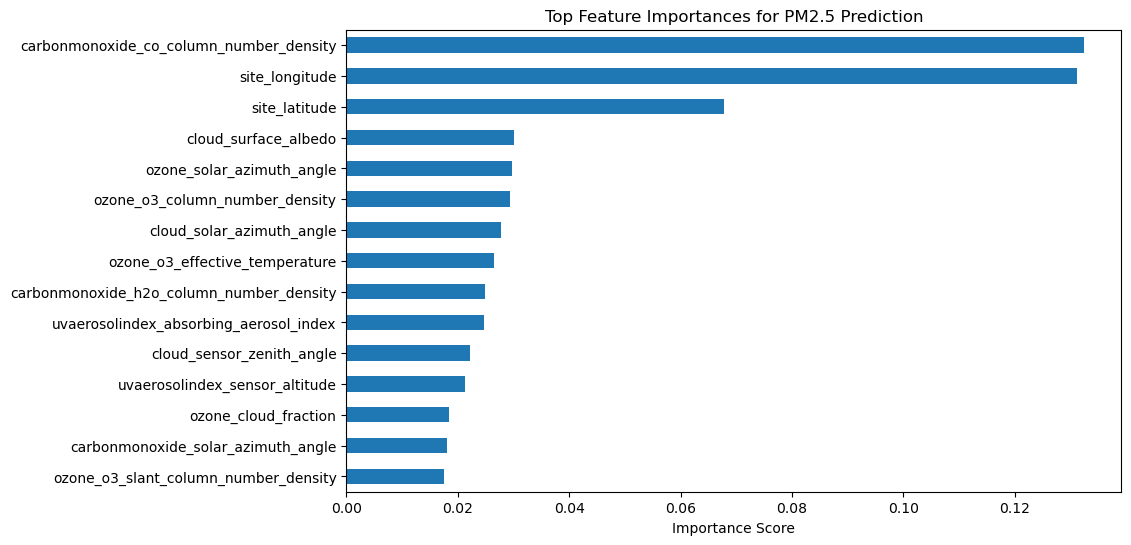

In [14]:
# Get feature importances from the trained model
importances = model.feature_importances_

# Map them to feature names
features = X_train.columns
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)

# Plot top features
plt.figure(figsize=(10, 6))
feature_importance.head(15).plot(kind='barh')
plt.title("Top Feature Importances for PM2.5 Prediction")
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.show()


In [15]:
# Convert 'timestamp' to proper datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Create new time-based features
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month
df['weekday'] = df['timestamp'].dt.weekday
df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)

# Optional: Cluster locations into 5 groups using latitude & longitude
from sklearn.cluster import KMeans

coords = df[['site_latitude', 'site_longitude']]
kmeans = KMeans(n_clusters=5, random_state=42)
df['location_cluster'] = kmeans.fit_predict(coords)

In [16]:
# Define the features and target again, now including engineered features
feature_cols = [
    'carbonmonoxide_co_column_number_density',
    'site_latitude',
    'site_longitude',
    'cloud_surface_albedo',
    'ozone_solar_azimuth_angle',
    'hour',
    'day',
    'month',
    'weekday',
    'is_weekend',
    'location_cluster'
]

X = df[feature_cols]
y = df['pm2_5']

# Split again
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("📊 Model Evaluation:")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R² (R-squared): {r2:.2f}")

📊 Model Evaluation:
MAE (Mean Absolute Error): 6.43
RMSE (Root Mean Squared Error): 15.83
R² (R-squared): 0.65


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter distribution to sample from
param_dist = {
    'n_estimators': randint(100, 500),             # number of trees
    'max_depth': randint(5, 30),                   # depth of each tree
    'min_samples_split': randint(2, 10),           # min samples to split a node
    'min_samples_leaf': randint(1, 10),            # min samples at a leaf
    'max_features': ['auto', 'sqrt', 'log2']       # number of features considered at each split
}

In [19]:
# Set up the search
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=50,                  # number of random combinations to try
    cv=5,                       # 5-fold cross-validation
    scoring='neg_root_mean_squared_error',
    random_state=42,
    n_jobs=-1                   # use all processors
)

# Fit the search to your training data
random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best CV Score (Negative RMSE):", random_search.best_score_)

C:\Users\Joe Oyeyinka\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
100 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
63 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Joe Oyeyinka\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Joe Oyeyinka\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Joe Oyeyinka\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Joe 

Best Parameters: {'max_depth': 26, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 223}
Best CV Score (Negative RMSE): -15.73530231855863


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Use the best estimator
best_rf = random_search.best_estimator_

# Predict on the test set
y_pred = best_rf.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"📊 Tuned Model Evaluation:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

📊 Tuned Model Evaluation:
MAE: 6.58
RMSE: 15.97
R²: 0.64


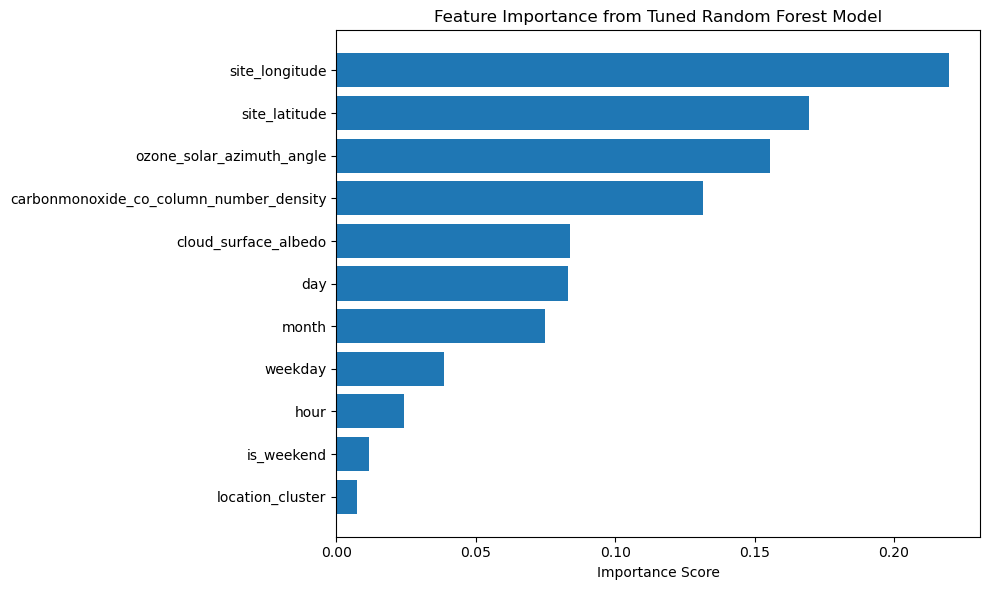

In [21]:
# Get the best model from random search
best_model = random_search.best_estimator_

# Get feature importances from the trained model
importances = best_model.feature_importances_

# Match them to the feature names
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.title('Feature Importance from Tuned Random Forest Model')
plt.gca().invert_yaxis()  # Highest at the top
plt.tight_layout()
plt.savefig('my_plot.png')
plt.show()

In [22]:
# Drop low-importance features
X_reduced = X.drop(columns=['location_cluster', 'is_weekend', 'hour'])

# Split again (optional, if redoing CV or test)
from sklearn.model_selection import train_test_split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Retrain the model (assuming RandomForest with best_params)
from sklearn.ensemble import RandomForestRegressor

best_params = best_model.get_params()

best_params.pop('random_state', None)  # Removes a random state it if it exists
reduced_model = RandomForestRegressor(**best_params, random_state=42)

reduced_model.fit(X_train_r, y_train_r)

# Evaluate performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred_r = reduced_model.predict(X_test_r)

mae_r = mean_absolute_error(y_test_r, y_pred_r)
rmse_r = mean_squared_error(y_test_r, y_pred_r, squared=False)
r2_r = r2_score(y_test_r, y_pred_r)

print(f"Reduced Model Performance:\nMAE: {mae_r:.2f}\nRMSE: {rmse_r:.2f}\nR²: {r2_r:.2f}")

Reduced Model Performance:
MAE: 6.23
RMSE: 14.62
R²: 0.70


C:\Users\Joe Oyeyinka\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### 5. Model Evaluation

#### Visualizations:

Predictions vs Actuals Plot: Checks alignment of predictions with actual PM2.5 values.

Residual Plot: Shows patterns in errors.

Residual Histogram: Evaluates error distribution.

Q-Q Plot: Confirms if residuals follow a normal distribution.

#### Why:
Visual diagnostics reveal whether the model assumptions hold and if performance is adequate.

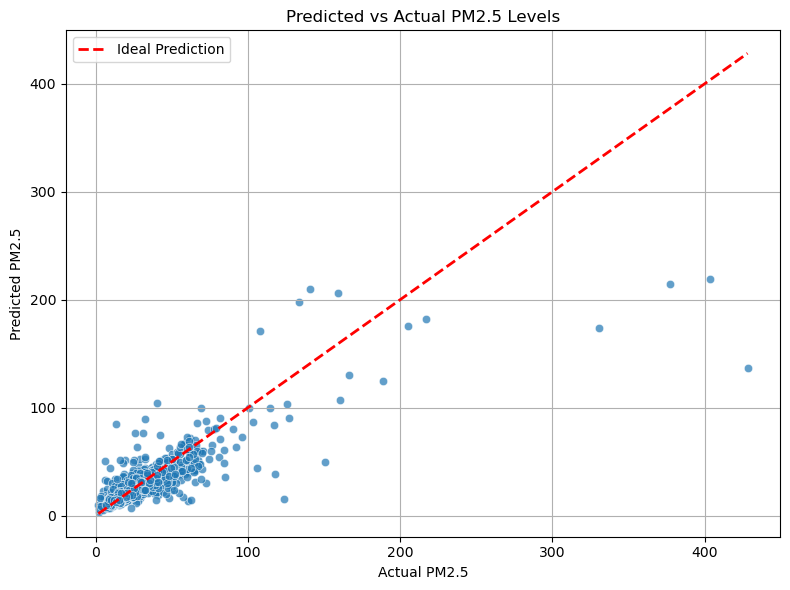

In [23]:
# Predict on the test set
y_pred_r = reduced_model.predict(X_test_r)

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_r, y=y_pred_r, alpha=0.7)

# Plot ideal line where prediction = actual
plt.plot([y_test_r.min(), y_test_r.max()],
         [y_test_r.min(), y_test_r.max()],
         'r--', lw=2, label='Ideal Prediction')

plt.xlabel("Actual PM2.5")
plt.ylabel("Predicted PM2.5")
plt.title("Predicted vs Actual PM2.5 Levels")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Predicted vs Actual')
plt.show()

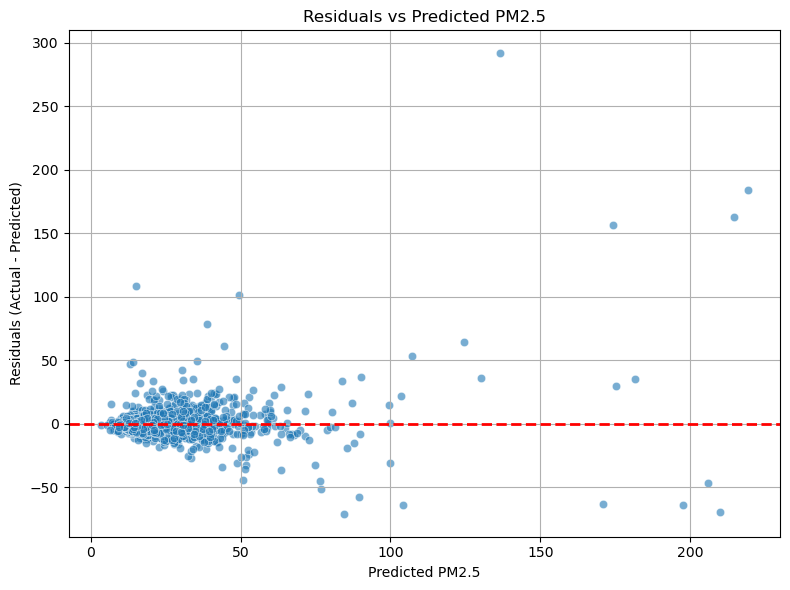

In [24]:
# Compute residuals
residuals = y_test_r - y_pred_r

# Plot residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_r, y=residuals, alpha=0.6)

# Horizontal line at zero error
plt.axhline(0, color='red', linestyle='--', linewidth=2)

plt.xlabel("Predicted PM2.5")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted PM2.5")
plt.grid(True)
plt.tight_layout()
plt.savefig('Residual (errors)')
plt.show()

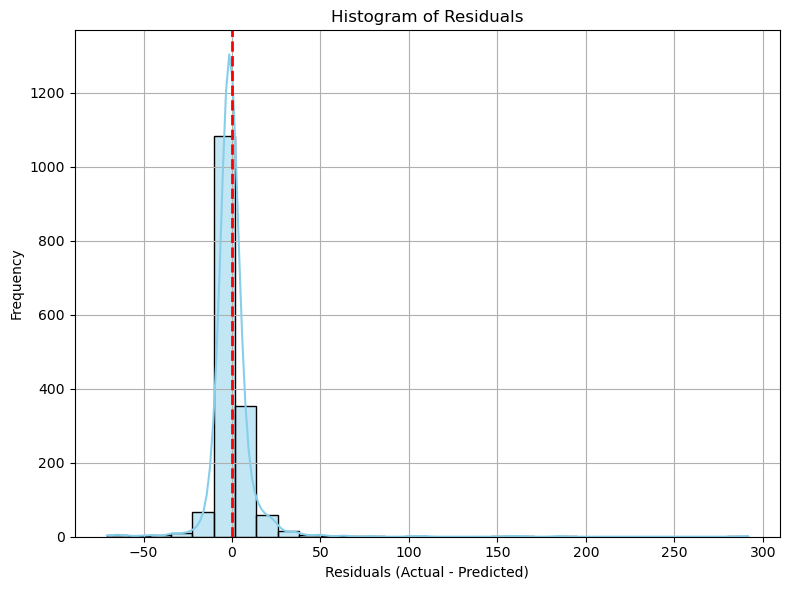

In [25]:
# Residuals (Histogram)

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='skyblue')

plt.axvline(0, color='red', linestyle='--', linewidth=2)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.savefig('Residuals (Histogram)')
plt.show()

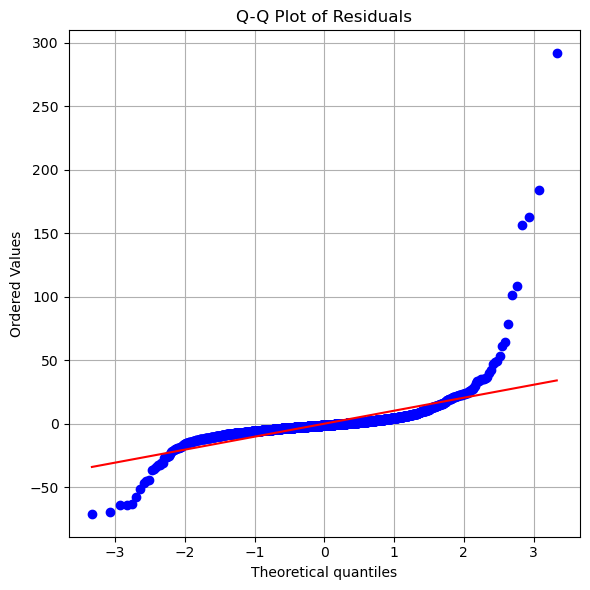

In [26]:
# Q-Q plot
import scipy.stats as stats

plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.grid(True)
plt.tight_layout()
plt.savefig('Q-Q plot')
plt.show()


### 6. Model Training

We trained the model on the training set using the defined pipeline. Cross-validation was applied to get an unbiased performance estimate, resulting in an average R² score of 0.60.

In [27]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(reduced_model, X_train_r, y_train_r, cv=5, scoring='r2')
print("Average R² from CV:", scores.mean())

Average R² from CV: 0.6025165470112945


### 7. Model Export

#### What we did:

Saved the trained pipeline to pm25_prediction_pipeline.pkl using joblib.

#### Why:
This allows us to reload and use the model in production without retraining

In [30]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('model', reduced_model)
])

# Save it
import joblib
joblib.dump(pipeline, 'pm25_prediction_pipeline.pkl')

['pm25_prediction_pipeline.pkl']

### 8. Potential Applications

Real-time PM2.5 forecasting with incoming IoT and satellite data

Integration into environmental monitoring dashboards

Deployment in air quality alert systems

##### Project by:
##### Kingsley Njoku
##### Data Scientist/ML Enthusiast